In [2]:
import pandas as pd
df=pd.read_csv('finaldataset.csv')
df

,author_timestamp,n_additions,n_deletions
0,2017-01-15 00:33:08,31,23
1,2016-12-26 09:10:19,65,0
2,2016-12-26 09:10:19,0,64
3,2016-12-26 09:10:19,1,1
4,2016-12-26 09:10:19,1,1
...,...,...,...
14240,2005-09-08 01:28:51,2,1
14241,2005-09-06 06:35:41,1,1
14242,2005-09-06 06:35:05,7,3
14243,2005-09-02 19:20:18,1,1


# K_Means Clusturing on our Featured Dataset

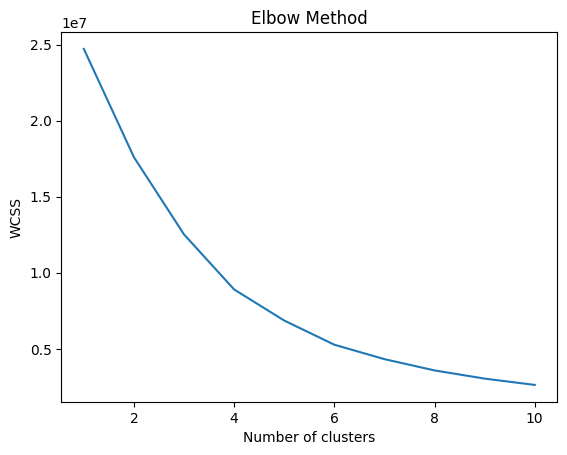

Silhouette score for  :  0.8088852541632086


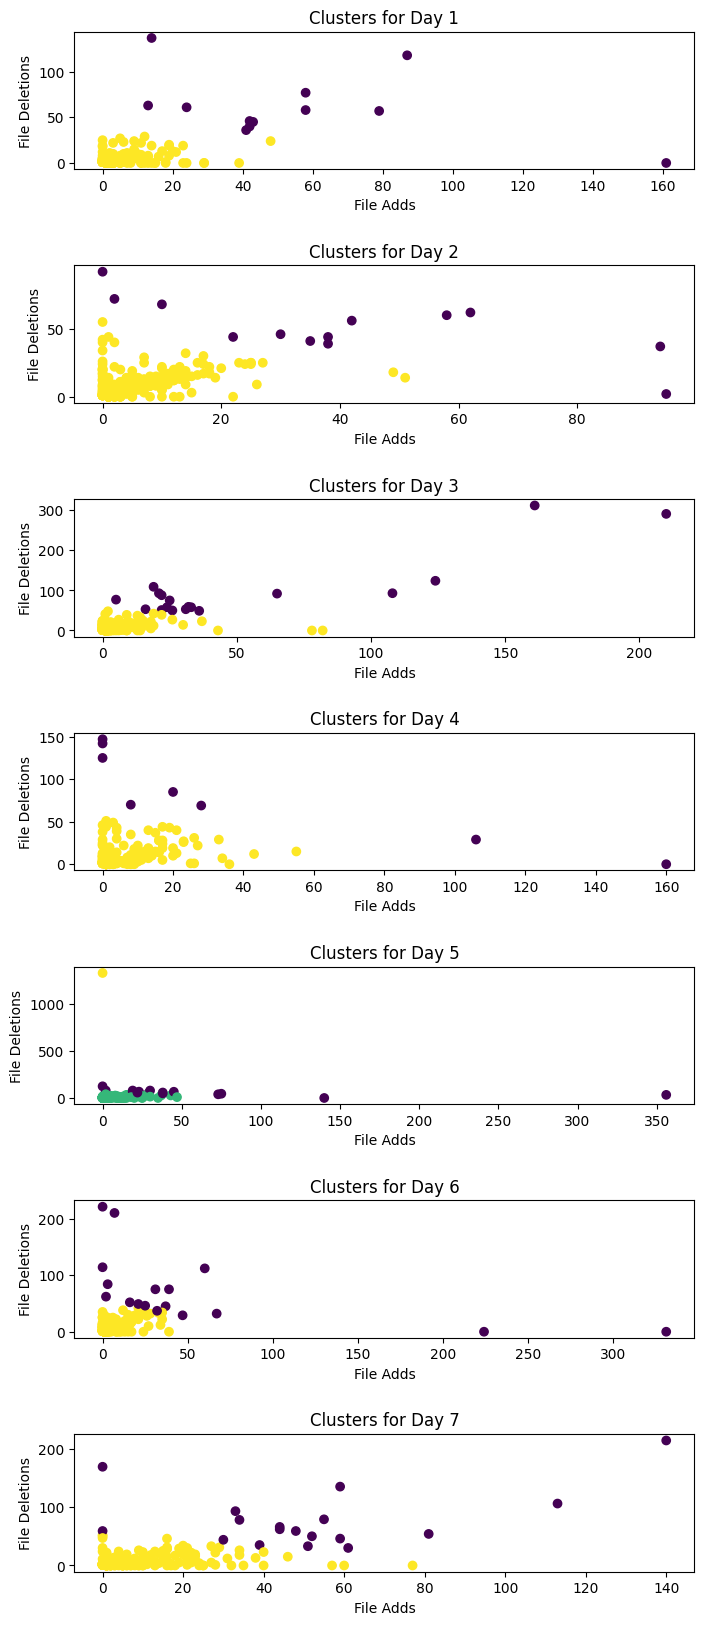

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Load data
data = pd.read_csv("finaldataset.csv")

# Extract day from timest feature
data['day'] = pd.DatetimeIndex(data['author_timestamp']).day

# Select features for clustering
X = data[['n_additions', 'n_deletions', 'day']].values

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print("Silhouette score for  : ", silhouette_score(X, y_kmeans))
# Visualize clusters
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of data')
# plt.xlabel('File Adds')
# plt.ylabel('File Deletions')
# plt.legend()
# plt.show()


fig,axs = plt.subplots(7, 1, figsize=(8,20))
for i in range(7):
    axs[i].scatter(data[data['day'] == i+1]['n_additions'], data[data['day'] == i+1]['n_deletions'], c=y_kmeans[data['day'] == i+1])
    axs[i].set_title('Clusters for Day ' + str(i+1))
    axs[i].set_xlabel('File Adds')
    axs[i].set_ylabel('File Deletions')
    plt.subplots_adjust(hspace=0.7)
plt.show()
# print(end="\n")

# DBSCAN Algorithm

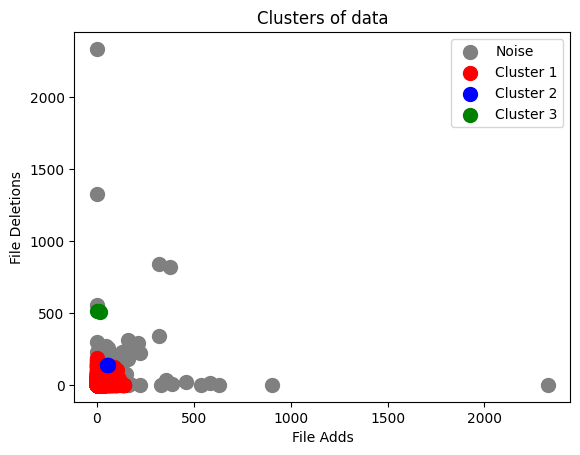

Estimated number of clusters: 6
Estimated number of noise points: 45
Silhouette score: 0.8470523802582508


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("finaldataset.csv")

# Extract day from timest feature
data['day'] = pd.DatetimeIndex(data['author_timestamp']).day

# Select features for clustering
X = data[['n_additions', 'n_deletions', 'day']].values

# Perform clustering
dbscan = DBSCAN(eps=18, min_samples=3)
y_dbscan = dbscan.fit_predict(X)

# Visualize clusters
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'gray', label = 'Noise')
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of data')
plt.xlabel('File Adds')
plt.ylabel('File Deletions')
plt.legend()
plt.show()

# Print number of clusters and noise points
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

# Print silhouette score (if applicable)
print("Silhouette score:", silhouette_score(X, y_dbscan))


# ISOLATION FOREST

C:\Users\Kowshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kowshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kowshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Accuracy: 0.90
Confusion matrix:
 [[    0     0]
 [ 1425 12820]]
Classification report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.90      0.95     14245

    accuracy                           0.90     14245
   macro avg       0.50      0.45      0.47     14245
weighted avg       1.00      0.90      0.95     14245



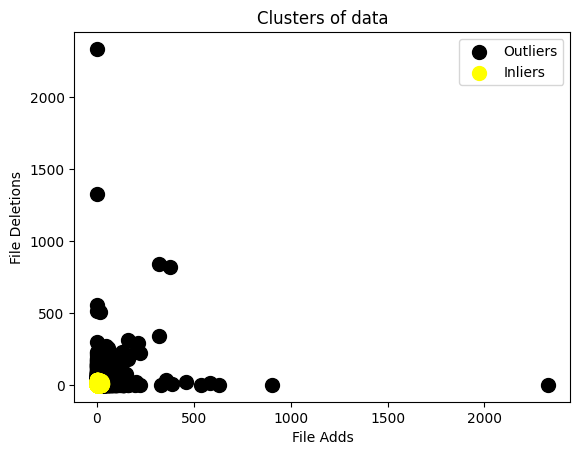

Estimated number of inliers: 12820
Estimated number of outliers: 1425


In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("finaldataset.csv")

# Extract day from timest feature
data['day'] = pd.DatetimeIndex(data['author_timestamp']).day

# Select features for clustering
X = data[['n_additions', 'n_deletions', 'day']].values

# Perform clustering
isolation_forest = IsolationForest(n_estimators=90, contamination=0.1)
isolation_forest.fit(X)
y_isof = isolation_forest.predict(X)

# Compute metrics
accuracy = accuracy_score(y_true=np.ones(len(X)), y_pred=y_isof)
conf_matrix = confusion_matrix(y_true=np.ones(len(X)), y_pred=y_isof)
class_report = classification_report(y_true=np.ones(len(X)), y_pred=y_isof)

# Print metrics
print('Accuracy: %.2f' % accuracy)
print('Confusion matrix:\n', conf_matrix)
print('Classification report:\n', class_report)

# Visualize clusters
plt.scatter(X[y_isof == -1, 0], X[y_isof == -1, 1], s = 100, c = 'black', label = 'Outliers')
plt.scatter(X[y_isof == 1, 0], X[y_isof == 1, 1], s = 100, c = 'yellow', label = 'Inliers')
plt.title('Clusters of data')
plt.xlabel('File Adds')
plt.ylabel('File Deletions')
plt.legend()
plt.show()

# Print number of inliers and outliers
n_inliers = len(y_isof[y_isof == 1])
n_outliers = len(y_isof[y_isof == -1])
print('Estimated number of inliers: %d' % n_inliers)
print('Estimated number of outliers: %d' % n_outliers)
